<a href="https://colab.research.google.com/github/violetafurculita/ML-AI-UC-Berkeley-Course/blob/main/Capstone_Project_Credit_Card_Default_Payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Capstone Project Predict Credit Card Payment Default***

**Author - Violeta Furculita**

**Research Question: Can Machine Learning models accurately predict whether credit card customers will default or not on their payments?**

To answer this question we will leverage the studied and practiced **CRISP-DM** framework.

The CRISP DM framework uses the following steps to solve any business problem using data analytics and machine learning:


1.   Business Understanding
2.   Data Understanding
3.   Data Preparation
4. Modeling
5. Evaluation
6. Deployment

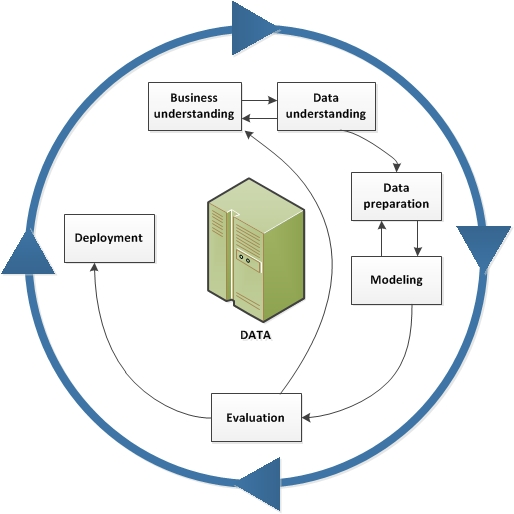


# **Business Understanding**

**Problem Statement**

Our customers - a credit card financial institution - wants to have a better understanding of the factors that impact credit card payment default and get a solution in place that can predict with high accuracy whether customers will default on payments.

To solve this problem we are given a dataset that contains credit card payment information and it is our task to determine what factors impact payment default as well as build a model or an ensemble of models that can predict default.

**Goal**

Our goal is to use various machine learning models and/or an ensemble we have learned during the course to predict credit card defaults. From training and running these models we will make a recommendation on the model type to use for high accuracy predictions and the features that have the highest impact on predicting default.

# **Data Understanding**

Now we are going to delve into the data and specifically understand it, specificaly we will look at:


1.   Any data quality issues - missing values, formating, features
2. Data structure accross all features
3.   Data structure for the prediction feature - the default on payment.
4. Data type
5. Feature correlation
6. Determine what features may make sense to drop as a result of the above analysis




**Install libraries we need to process data**

In [1]:
pip install missingno

In [2]:
pip install tabulate

In [3]:
pip install imblearn

In [4]:
#Import all libraries we need to work on this problem
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import time
from tabulate import tabulate
from plotly.figure_factory import create_table
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, KBinsDiscretizer, StandardScaler, QuantileTransformer,LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('cc_default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**The predictive feature is a binary variable - default payment next month** (Yes = 1, No = 0).

The dataframe uses 23 variables as explanatory variables:
*  Limit_Bal - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
*  Sex (1 = male; 2 = female).
*  Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
*  Marriage (1 = married; 2 = single; 3 = others).
*  Age (year).
* Pay_0 to Pay_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
  * Pay_0 = the repayment status in September, 2005;
  * Pay_1 = the repayment status in August, 2005; . . .;
  * Pay_6 = the repayment status in April, 2005.
  
  The measurement scale for the repayment status is:
  * -1 = pay duly;
  * 1 = payment delay for one month;
  * 2 = payment delay for two months; . . .;
  * 8 = payment delay for eight months;
  * 9 = payment delay for nine months and above.
* Bill_amt: Amount of bill statement (NT dollar).
  * Bill_amt_0 = amount of bill statement in September, 2005;
  * Bill_amt_1= amount of bill statement in August, 2005; . . .;
  * Bill_amt_6 = amount of bill statement in April, 2005.
* Pay_amt: Amount of previous payment (NT dollar).
  * Pay_amt_0 = amount paid in September, 2005;
  * Pay_amt_1 = amount paid in August, 2005; . . .;
  * Pay_amt_6 = amount paid in April, 2005.


In [6]:
#Display the data type and the Columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<Axes: >

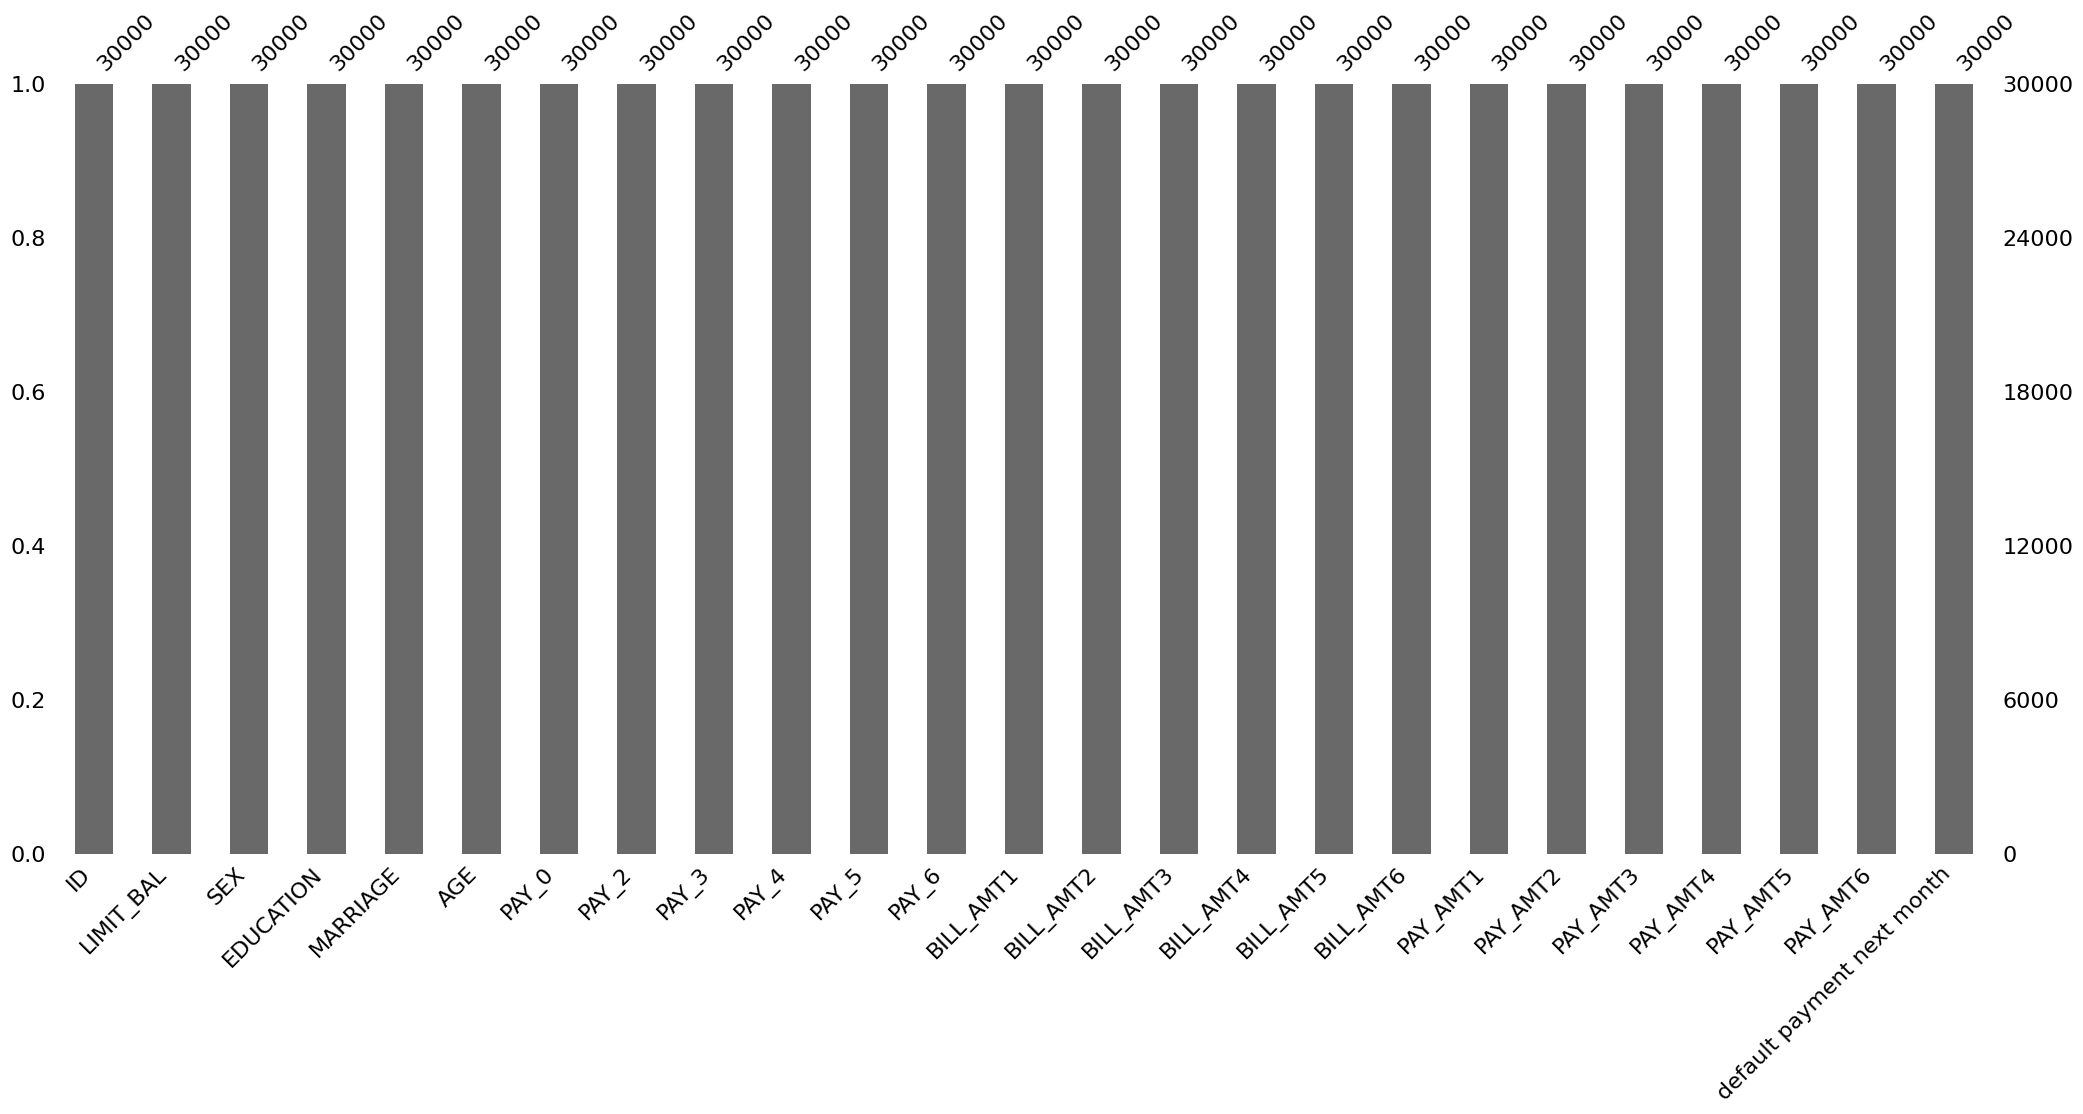

In [7]:
#Visualize the data to check for missing values
msno.bar(df)

**Observation**
No missing values in the data set

<Axes: >

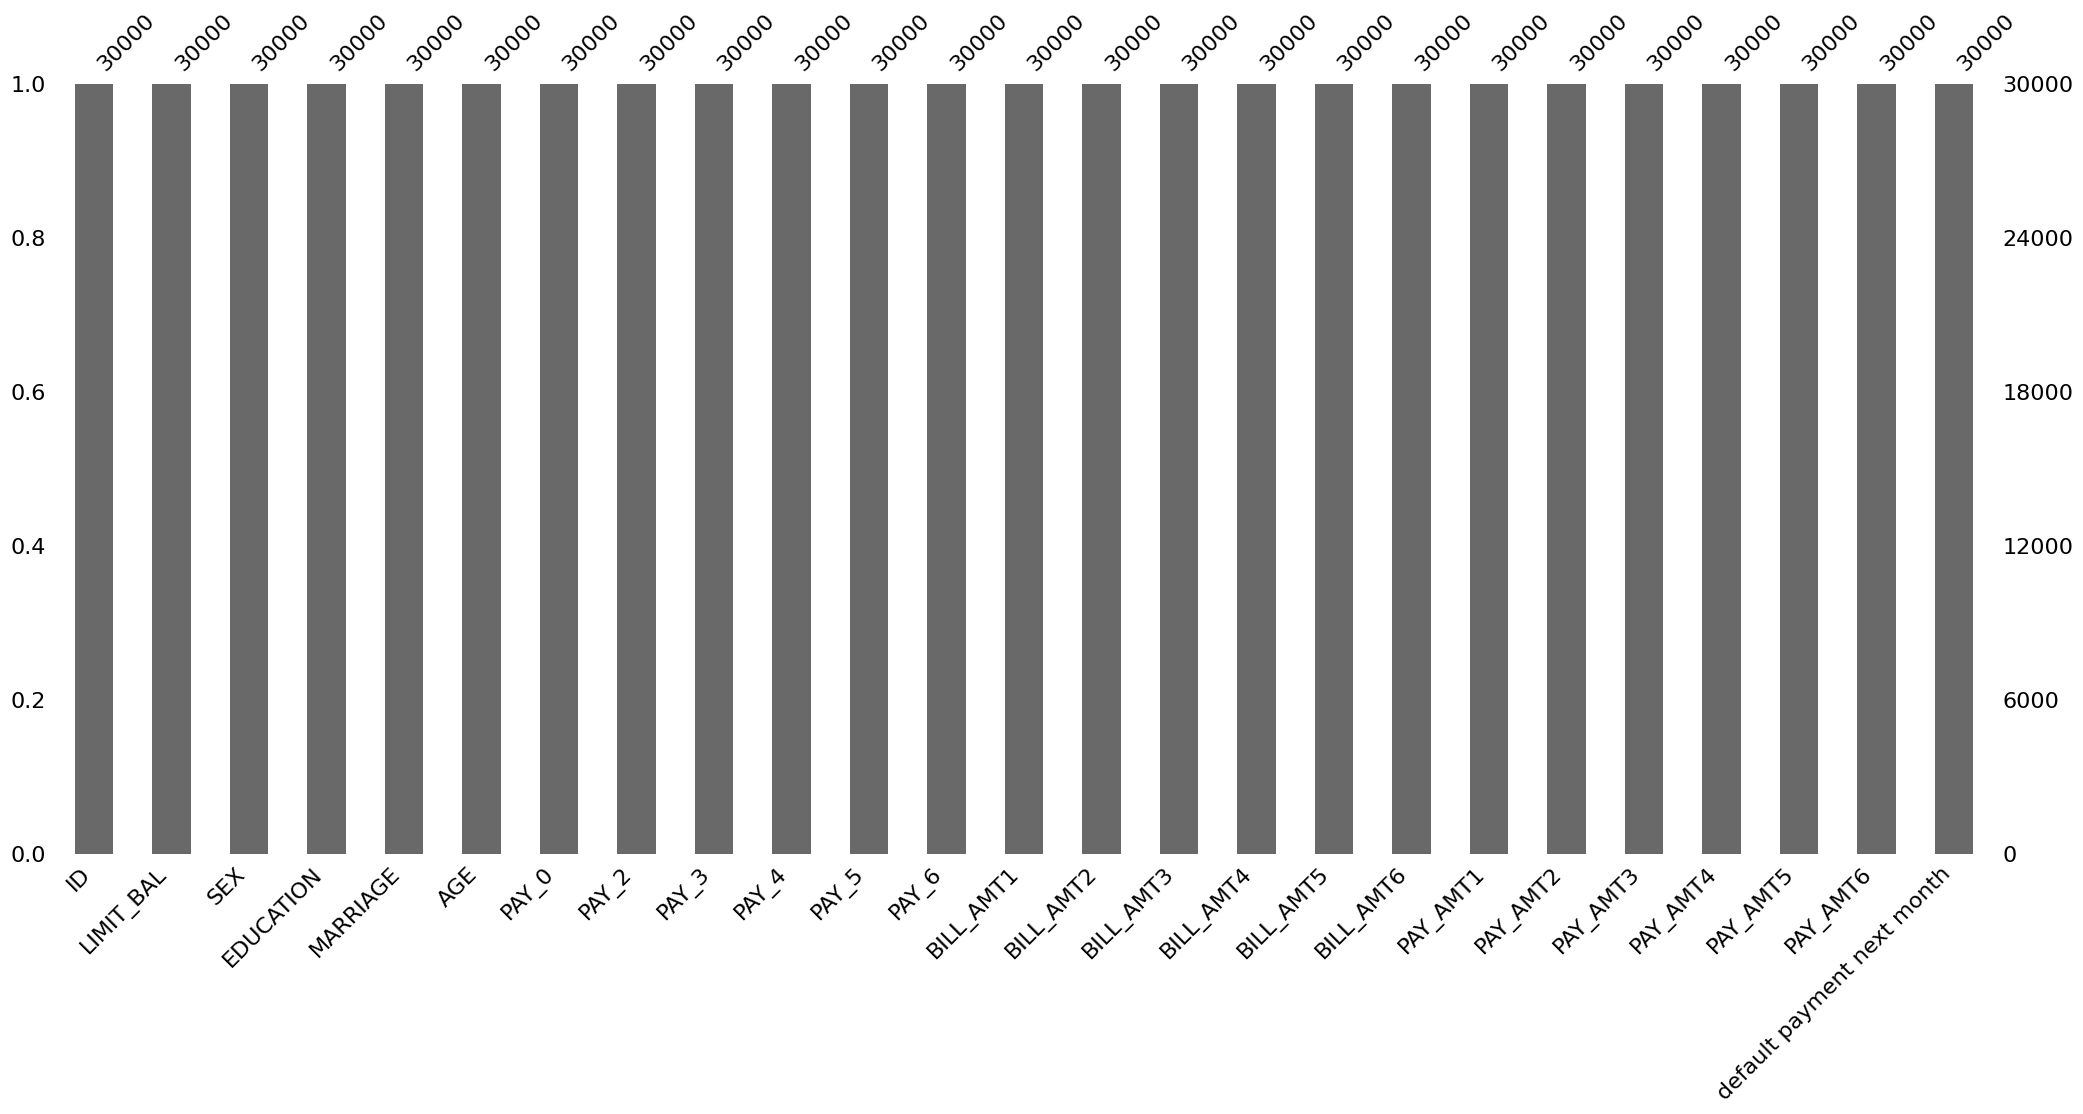

In [8]:
# Check for and remove any NaN data and duplicates
df.dropna()
df.drop_duplicates(inplace=True)

#Reset the index after dropping duplicates and not available values
df=df.reset_index(drop=True)

#visualize data chnages post duplicates and NaN removal
msno.bar(df)

**Observation** there are no missing values or duplicates in the original dataset

In [9]:
#Update column name for predictive variable
df.rename(columns={'default payment next month':'DEFAULT','PAY_0':'PAY_1'},inplace=True)
#visualize the dataframe with updated column name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

**Now let's take a look at the data to see how various features impact the target variable DEFAULT- whether the client will default on the next credit card payment**

In [10]:
for col in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']: print(f'Unique values in {col}: {df[col].unique()}')

Unique values in PAY_1: [ 2 -1  0 -2  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  0  2 -2  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  0 -2  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [-2  0 -1  2  3  5  4  7  8  6]
Unique values in PAY_6: [-2  2  0 -1  3  6  4  7  8  5]


**Observation** according to the data description we expect values between -1 to 9 in these columns. Values of 9 are non existent and values of -2 are present. We will convert all values that are -2 into 9 for the purposes of this assignment.

In [11]:
df['PAY_1'] = np.where(df['PAY_1'].isin([-2]), 9, df['PAY_1'])
df['PAY_2'] = np.where(df['PAY_2'].isin([-2]), 9, df['PAY_2'])
df['PAY_3'] = np.where(df['PAY_3'].isin([-2]), 9, df['PAY_3'])
df['PAY_4'] = np.where(df['PAY_4'].isin([-2]), 9, df['PAY_4'])
df['PAY_5'] = np.where(df['PAY_5'].isin([-2]), 9, df['PAY_5'])
df['PAY_6'] = np.where(df['PAY_6'].isin([-2]), 9, df['PAY_6'])

for col in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
  print(f'Unique values in {col}: {df[col].unique()}')

Unique values in PAY_1: [ 2 -1  0  9  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2  0 -1  9  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  0  2  9  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  0  9  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [ 9  0 -1  2  3  5  4  7  8  6]
Unique values in PAY_6: [ 9  2  0 -1  3  6  4  7  8  5]


In [12]:
for col in ['SEX','EDUCATION','MARRIAGE']: print(f'Unique values in {col}: {df[col].unique()}')

Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]


**Observation**

According to the data description the **EDUCATION** column shall only contain values (1 = graduate school; 2 = university; 3 = high school; 4 = others). As we see from above, the column contains in addition values equal to 0,5 and 6. We will convert those values into 4 as others.

For column **Marriage** the acceptable vaues shall be (1 = married; 2 = single; 3 = others). the dataframe contains 0 as a value. we will replace all 0 with 3 as others.

In [13]:
df['EDUCATION'] = np.where(df['EDUCATION'].isin([0,5,6]), 4, df['EDUCATION'])

for col in ['EDUCATION']:
  print(f'Unique values in {col}: {df[col].unique()}')

Unique values in EDUCATION: [2 1 3 4]


In [14]:
df['MARRIAGE'] = np.where(df['MARRIAGE'].isin([0]), 3, df['MARRIAGE'])

for col in ['MARRIAGE']:
  print(f'Unique values in {col}: {df[col].unique()}')

Unique values in MARRIAGE: [1 2 3]


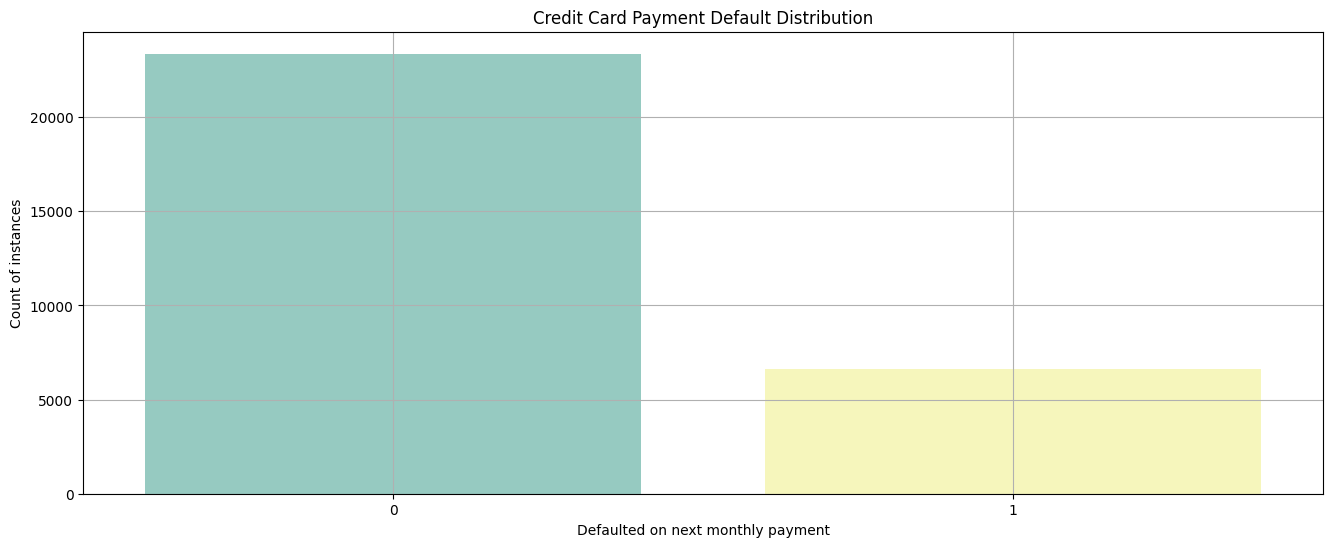

In [15]:
value_counts = df['DEFAULT'].value_counts()
color_palette = sns.color_palette("Set3")

plt.figure(figsize=(16, 6))
sns.countplot(x='DEFAULT', data=df, palette=color_palette)
plt.title('Credit Card Payment Default Distribution')
plt.xlabel('Defaulted on next monthly payment')
plt.ylabel('Count of instances')
plt.grid()

plt.show()

**Observation** 22% of credit card payment instances have defaulted on next payments

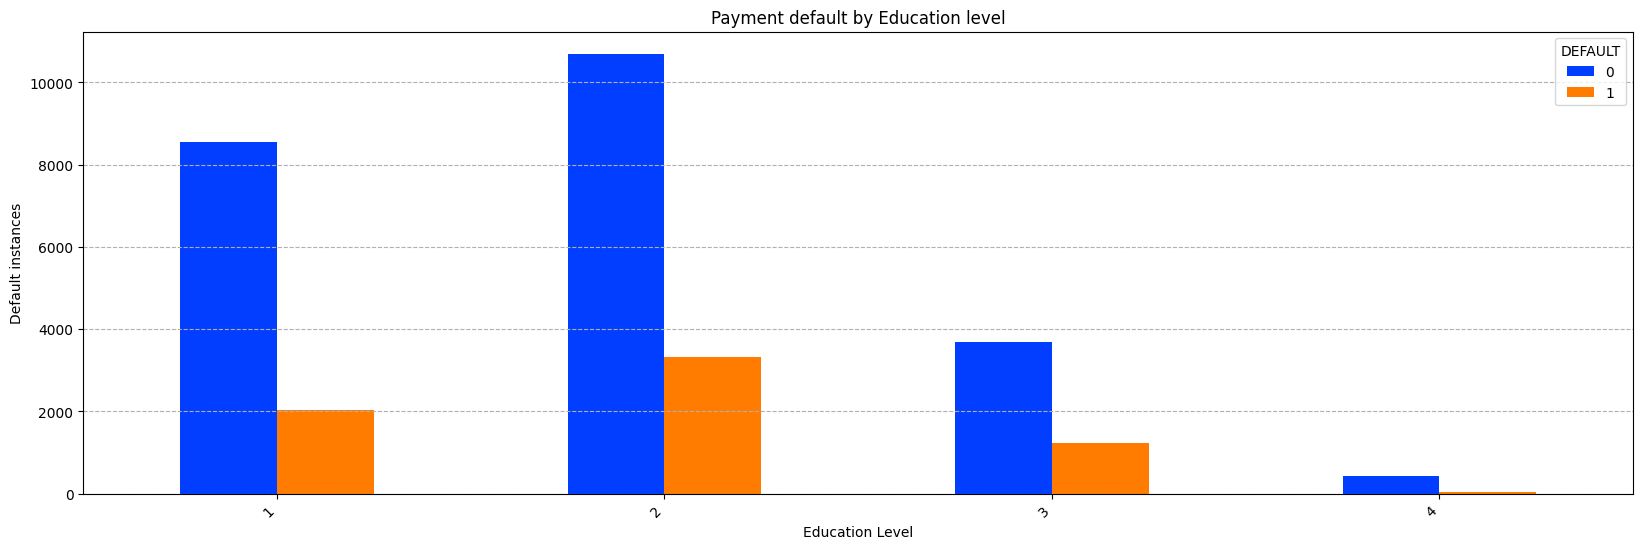

In [16]:
df.groupby('DEFAULT').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.EDUCATION,df.DEFAULT).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Payment default by Education level')
plt.xlabel('Education Level')
plt.ylabel('Default instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** customers with university and graduate level education have defaulted the most on payments.

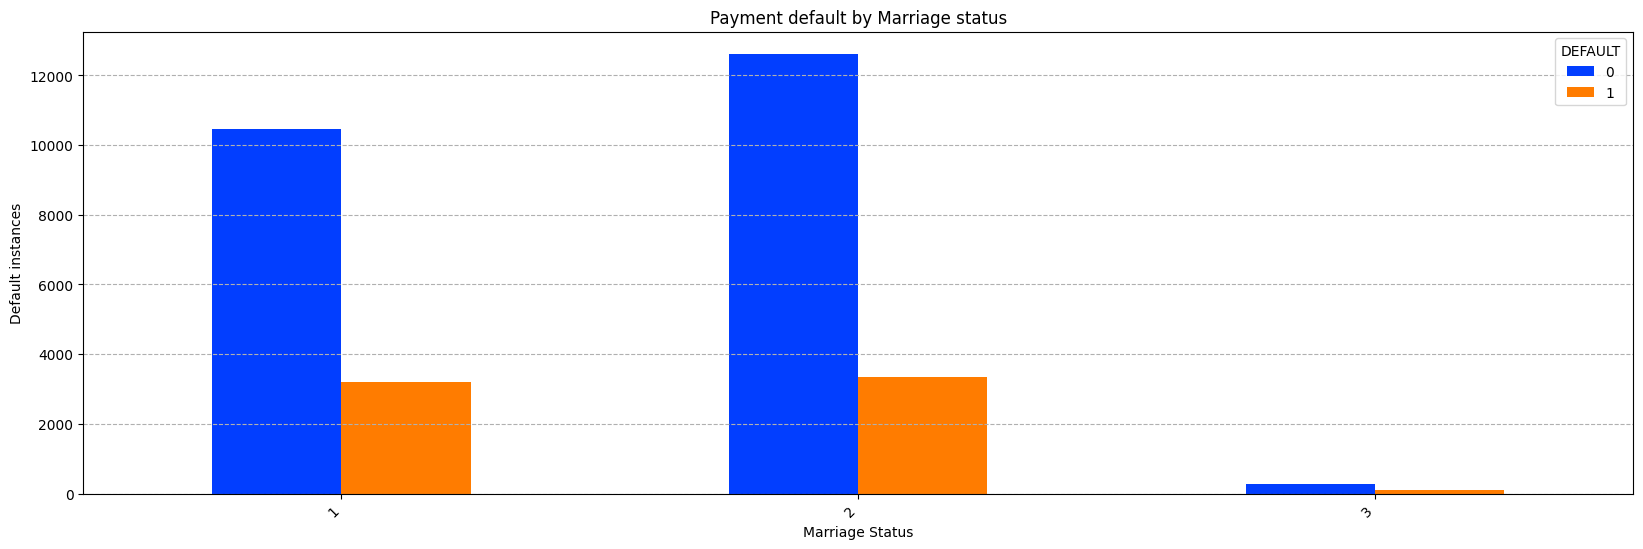

In [17]:
df.groupby('DEFAULT').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.MARRIAGE,df.DEFAULT).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Payment default by Marriage status')
plt.xlabel('Marriage Status')
plt.ylabel('Default instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** Married and single customers have almost the same default rate

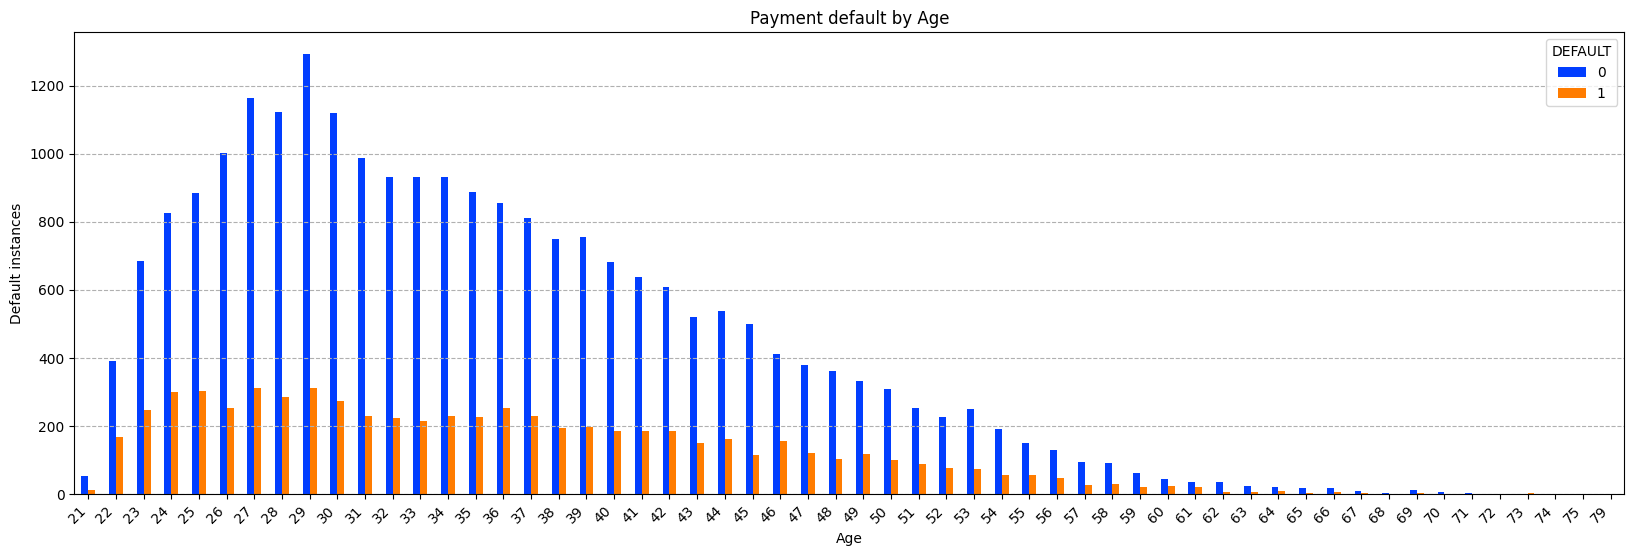

In [18]:
df.groupby('DEFAULT').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.AGE,df.DEFAULT).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Payment default by Age')
plt.xlabel('Age')
plt.ylabel('Default instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation**  Customers ages 23-49 seem to have elevated propensity of default as compared to other age groups

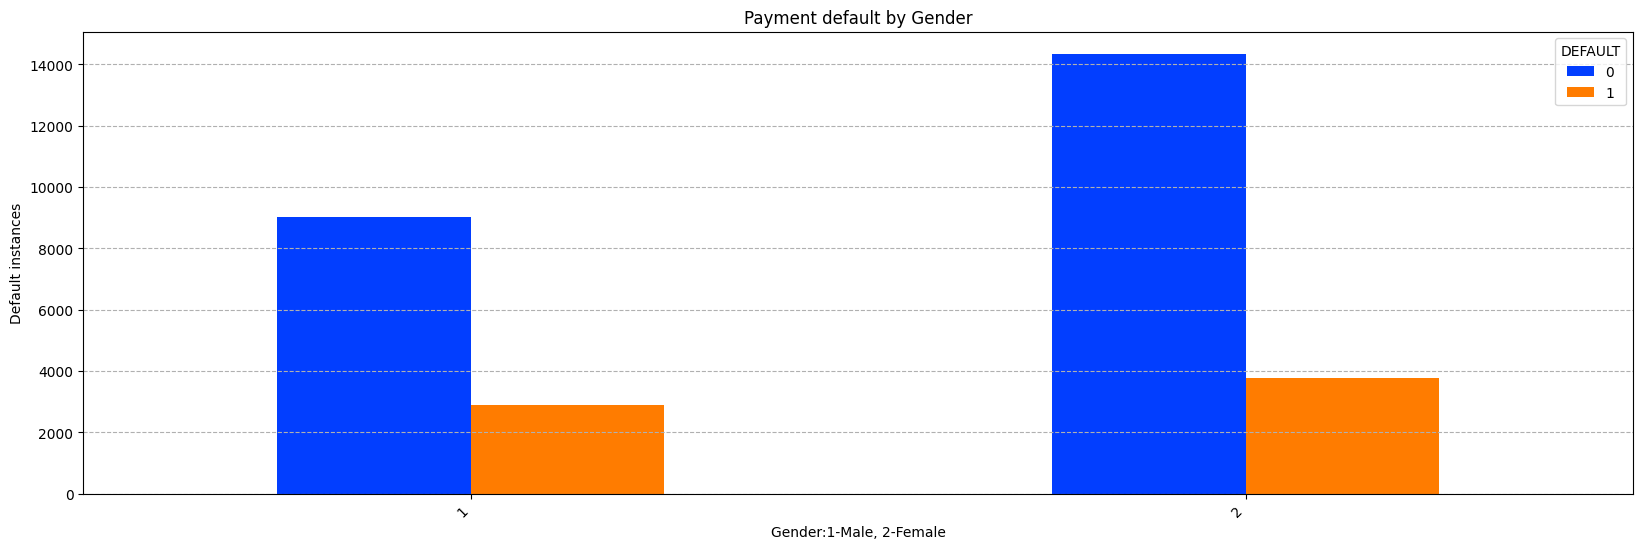

In [19]:
df.groupby('DEFAULT').mean()
colors = sns.color_palette('bright')
pd.crosstab(df.SEX,df.DEFAULT).plot(kind="bar",figsize=(20,6), color = colors)
plt.title('Payment default by Gender')
plt.xlabel('Gender:1-Male, 2-Female')
plt.ylabel('Default instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** females have higher default payment rates as compared to men.

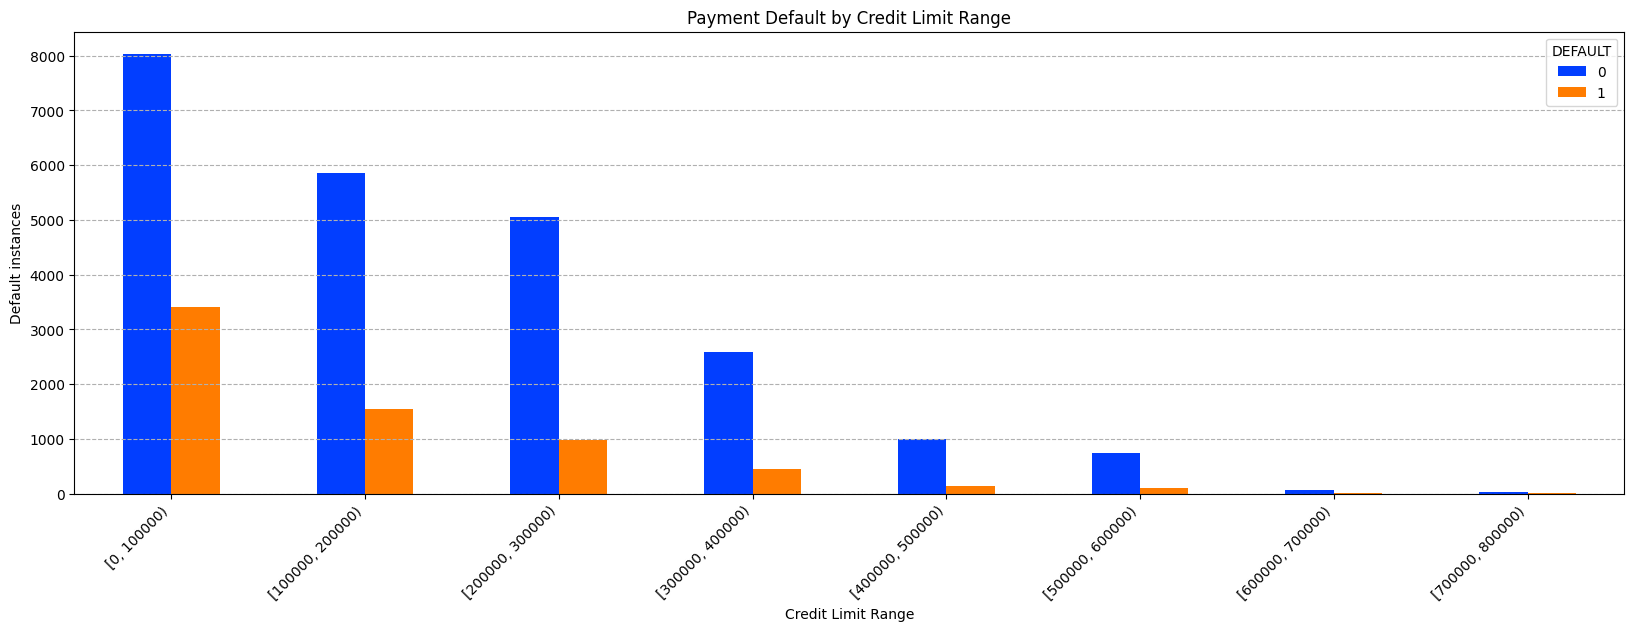

In [20]:
limit_bins = pd.cut(df['LIMIT_BAL'], bins=np.arange(0, 800001, 100000), right=False)

df.groupby('DEFAULT').mean()
colors = sns.color_palette('bright')
pd.crosstab(limit_bins, df.DEFAULT).plot(kind="bar",figsize=(20,6), color=colors)

plt.title('Payment Default by Credit Limit Range')
plt.xlabel('Credit Limit Range')
plt.ylabel('Default instances')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

**Observation** customers with credit limits between 20,000 and 100,000 have the highest propensity of defaulting on their payments.

**Now we will look at the relatioships between multiple features at the same time to see if we can further draw insights from the data.**

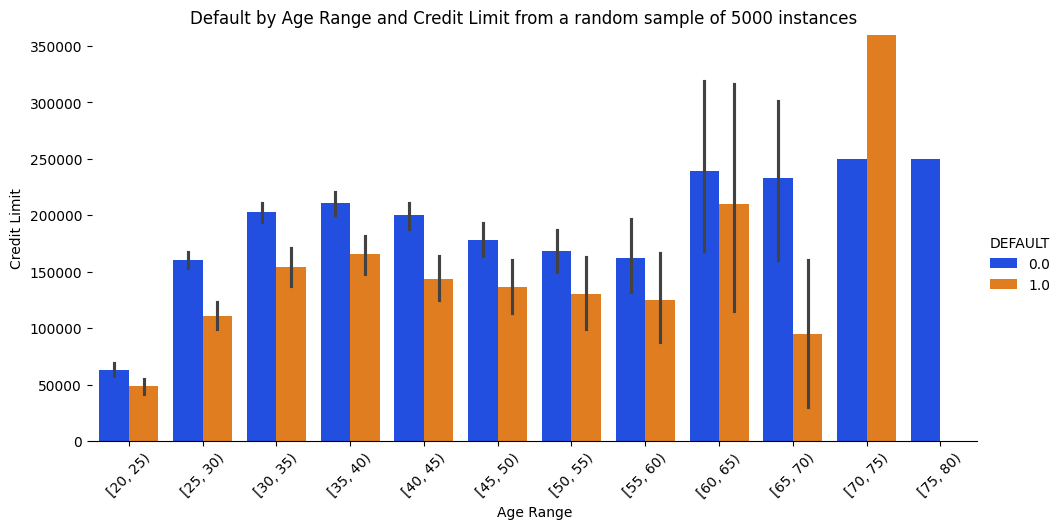

In [21]:
age_bins = pd.cut(df['AGE'], bins=np.arange(20, 81, 5), right=False)

pal = sns.color_palette("bright", n_colors=len(df["DEFAULT"].unique()))

g = sns.catplot(x=age_bins, y="LIMIT_BAL", hue="DEFAULT",
                 data=df.sample(5000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)
g.set_axis_labels("Age Range", "Credit Limit")
g.fig.suptitle("Default by Age Range and Credit Limit from a random sample of 5000 instances")

g.set_xticklabels(rotation=45)
g.despine(left=True)

**Observation**
There is a strong relationship between available credit limit and default rates. From the sample of 5000 instances we notice that for older age customers with higher credit limits there are higher default rates.

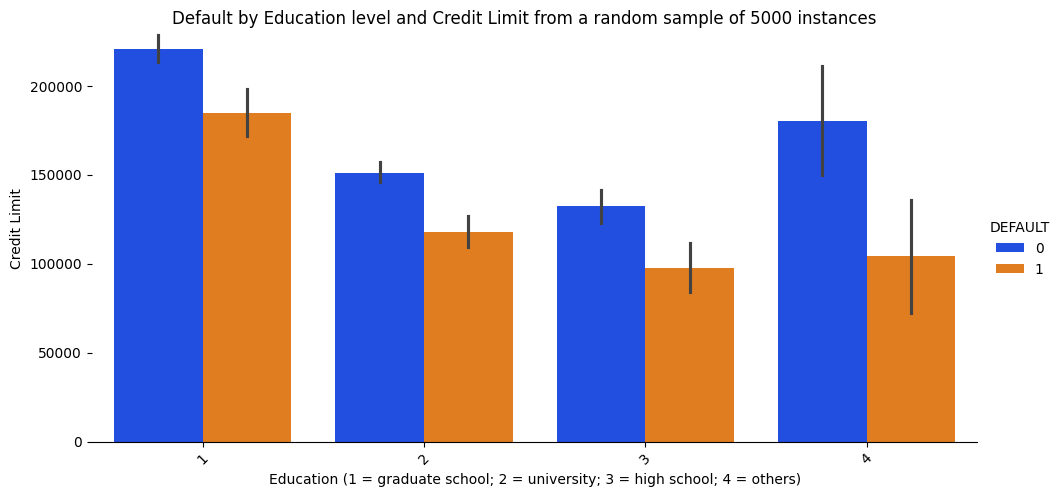

In [22]:
pal = sns.color_palette("bright", n_colors=len(df["DEFAULT"].unique()))

g = sns.catplot(x="EDUCATION", y="LIMIT_BAL", hue="DEFAULT",
                 data=df.sample(5000), kind="bar",
                 aspect=2, height=5, palette=pal)

g.set_xticklabels(rotation=45)

g.set_axis_labels("Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)", "Credit Limit")
g.fig.suptitle("Default by Education level and Credit Limit from a random sample of 5000 instances")

g.set_xticklabels(rotation=45)
g.despine(left=True)

**Observation**
Customers with graduate degrees tend to be offered or have higher credit limits and they tend to also default more than customers with university and high school education.

#**Data Preparation**


During this step we will construct the final dataset that will be used for model training and testing. In this step we will also look at any data transformation such as scaling, normalization, use of logarythms, feature selection and/or engineering of new features.

In [23]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.994933,1.252967,1.331633,1.3736,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,2.712002,3.096551,3.189356,3.2694,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.0000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.0000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.0000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,2.000000,2.000000,2.0000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,9.000000,9.000000,9.000000,9.0000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Observation** Since the data is in integer format we will not encode it.

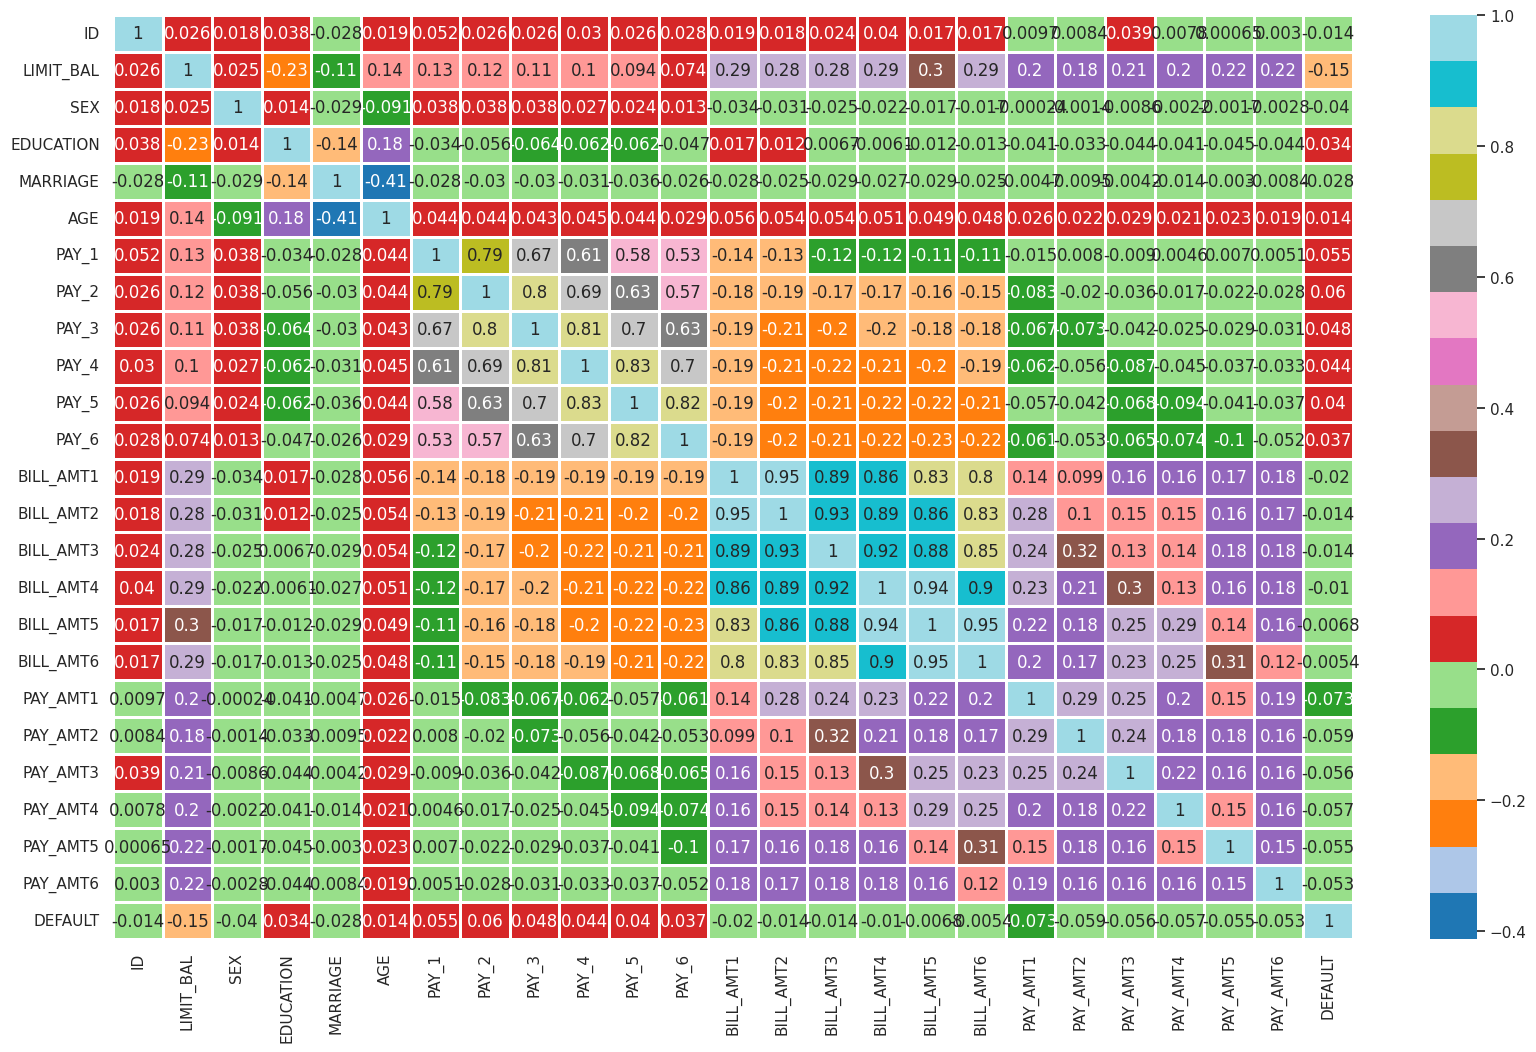

In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Configure the heatmap
sns.set_theme(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create and show the heatmap
f, ax = plt.subplots(figsize=(20, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
annot = True
sns.heatmap(correlation_matrix,annot=annot,cmap="tab20", linewidths=2, linecolor='white')
plt.show()

**Observation** Looking at the correlation heatmap we do not see any features with a strong positive or negative correlaiton with the Default feature.

# **Modeling**


Now that our data is prepared and ready to model, we will build a number of models and/or ensembles to target default prediction.

To solve this business problem we will use the following models based on supervised learning:
* **Logistic Regression** - One of the most basic and widely used algorithms for classification problems like default detection. It predicts the probability of an instance belonging to a particular class.

* **Decision Trees** - **Random Forest** is an ensemble of decision trees that can give high accuracy.

* **Support Vector Machines** (SVM) - Work well for classification with clear separability between classes.

* **Neural Networks** - Powerful models for complex patterns. **Convolutional neural networks** are suitable when dealing with sequential data like transactions.

* **Naive Bayes** - Fast, simple Bayesian approach based on applying Bayes' theorem. Commonly used as a baseline model.

* **K-Nearest Neighbors** (KNN) - Non-parametric algorithm that classifies items based on closest training examples in feature space.

1. **Train/Test Split**

  We will split the dataframe into a training and a test set. We will use the Synthetic Minority Oversampling Technique on the training set due to the imbalance in the predictive feature Default of 1(Yes) vs 0(No). The split between training and test sets will be a 70/30 ratio.

In [25]:
#Remove the column Default from the dataframe and create a new dataframe that does not contain the Default column
cols = df.columns
index = np.argwhere(cols == 'DEFAULT')
cols_new = np.delete(cols, index)
X_data = pd.DataFrame(df, columns=cols_new)

# Create a new data frame with only the Default column
selected_columns = ['DEFAULT']
y_data = df[selected_columns].copy()

# Define X and y
X = X_data
y=y_data

# Split data into 70/30 ratio between training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#Rebalance the training set with the Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state = 101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print(X_train_smote.shape, y_train_smote.shape)
print(X_test.shape, y_test.shape)

(32648, 24) (32648, 1)
(9000, 24) (9000, 1)


In [26]:
X_train.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,...,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,15015.693190,167114.270476,1.605905,1.841190,1.555143,35.500238,0.991857,1.248000,1.32200,1.377000,...,4.683957e+04,43077.632095,40241.574000,38882.845476,5635.291619,5.972116e+03,5216.177524,4894.010381,4857.917714,5234.388905
std,8668.483223,129252.691804,0.488667,0.745013,0.521555,9.227018,2.709234,3.089829,3.18346,3.270044,...,6.925942e+04,63894.134836,60508.571457,59158.766807,16864.535074,2.511248e+04,18220.544543,16114.800394,15839.845023,17713.638847
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-6.150600e+04,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7459.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.00000,0.000000,...,2.634500e+03,2313.000000,1746.000000,1272.750000,971.500000,8.797500e+02,390.000000,287.750000,241.000000,148.000000
50%,15084.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.000000,...,2.008750e+04,19018.500000,18123.500000,17150.000000,2100.000000,2.011000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22506.500000,240000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,2.000000,2.00000,2.000000,...,5.982850e+04,54671.000000,50527.250000,49496.750000,5011.000000,5.000000e+03,4520.750000,4001.000000,4058.500000,4000.000000
max,29999.000000,1000000.000000,2.000000,4.000000,3.000000,75.000000,9.000000,9.000000,9.00000,9.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000


**Observation**

The training data set contains 22 features. This typically leads to model complexity. We will use Principal Component Analysis - a dimentionality reduction technique to help us select the features that deliver the maximum amount of information or variance in the dataset.

In [27]:
#Run PCA and determine what number of features explain the maximum variance in the dataset
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_[:10].sum()

0.9927450069264002

**Observation** - **10 features explain 99% of the variance in the dataset. We will use the first 10 features to train models in next steps.**

In [28]:
#Use the identified 10 features to train and test the dataset for the baseline model
pca = PCA(n_components = 10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

2. **Build Baseline Model**

  **Now we will build a baseline model using Naive Bayes and scale the data with MinMaxScaler.We will use the MinMaxScaler because the data set contains negative values and this scaler will help standardize the data with values between positive 0 and 1.**

In [29]:
# Define the pipeline with MinMaxScaler and Multinomial Naive Bayes
pipes = {
    'mnb': Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', MultinomialNB())
    ])
}

#Define the Baseline Model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train, y_train.values.ravel())
    y_preds[model_name] = pipeline.predict(X_test)
    score = cross_val_score(pipeline, X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    score_time = np.mean(cross_validate(pipeline, X_train, y_train.values.ravel())['score_time'])
    scores[model_name] = {'score': score, 'score_time': score_time}
    print(f"Baseline model performance accuracy score {score:.4f} and fit time {score_time:.4f}")

Baseline model performance accuracy score 0.7773 and fit time 0.0038


**Observation** We trained the baseline model on the entire dataset rather than the PCA set. The Baseline model has an accuracy of 77.73% and a fit time of 0.008 seconds. In next steps we will further finetune the models to see if we can achieve better performance.

**Now we will train the baseline model with the PCA data set to see what the accuracy and fit time would be.**

In [30]:
# Define the pipeline with MinMaxScaler and Multinomial Naive Bayes
pipes = {
    'mnb': Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', MultinomialNB())
    ])
}

#Define the Baseline Model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train_pca, y_train.values.ravel())
    y_preds[model_name] = pipeline.predict(X_test_pca)
    score = cross_val_score(pipeline, X_train_pca, y_train.values.ravel(), cv=5, scoring='accuracy').mean()
    score_time = np.mean(cross_validate(pipeline, X_train_pca, y_train.values.ravel())['score_time'])
    scores[model_name] = {'score': score, 'score_time': score_time}
    print(f"Baseline model performance accuracy score {score:.4f} and fit time {score_time:.4f}")

Baseline model performance accuracy score 0.7773 and fit time 0.0015


**Observation** The baseline model trained on the PCA dataset retained the same accuracy while running even faster than the previous model.

**Now we will showcase visualy the performance of the baseline model.**

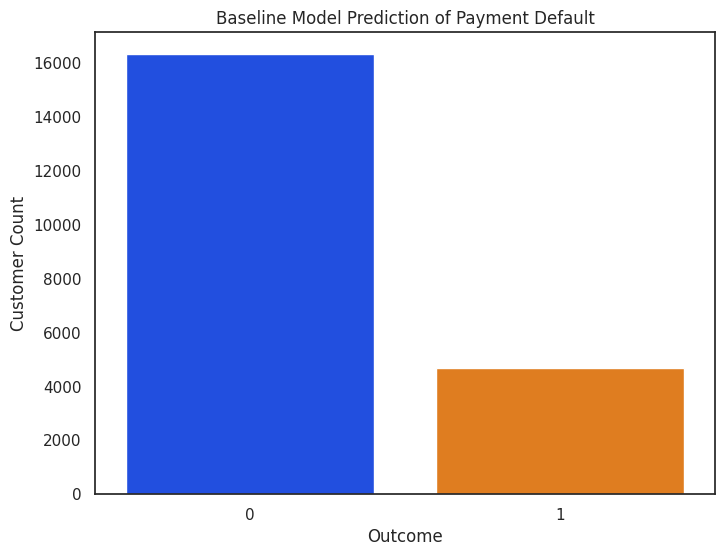

In [31]:
# Retrieve the predicted labels for multinomial Naive Bayes Baseline Model
y_pred_base = y_preds['mnb']

# Create a bar plot to showcase the predictions
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train['DEFAULT'].value_counts().index, y=y_train['DEFAULT'].value_counts(), palette="bright")
plt.title('Baseline Model Prediction of Payment Default')
plt.xlabel('Outcome')
plt.ylabel('Customer Count')

plt.show()

**Observation** the baseline model predicts in line with expectations.

**Now we will look at the baseline model Confusion matrix results and the classification report**

<Figure size 800x600 with 0 Axes>

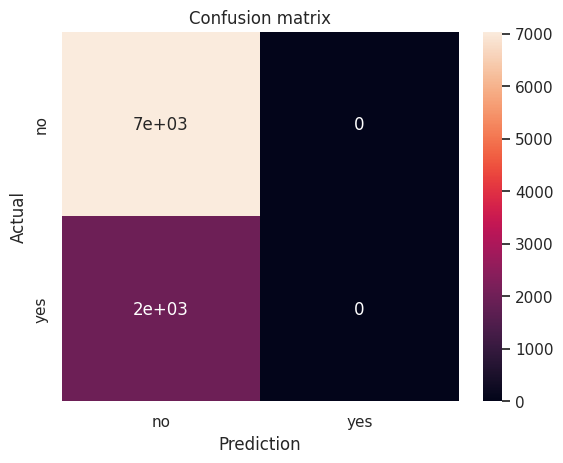

In [32]:
#Evaluate the model
cm = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots(1)
cmap = sns.color_palette("bright")

# Use seaborn's heatmap function
ax = sns.heatmap(cm, ax=ax, annot=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

# Set the title
ax.set_title('Confusion matrix')

# Set the x-axis and y-axis labels
ax.set_xticklabels(['no', 'yes'])
ax.set_yticklabels(['no', 'yes'])

plt.show()

In [33]:
# Evaluate the model by showcasing its precision, recall and f1 scores
print(classification_report(y_test, y_pred_base))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



**While the baseline model prediction  is 77.77% and the fit time is fast, we can do better. In the next steps we will work to finetune firther the models to find the best model to predict payment default.**

**For the next steps in our modeling we will run the following models**

1. Logistic Regression

2. Decision Trees

3. Support Vector Machines (SVM)
4. Neural Networks
5. K-Nearest Neighbors (KNN)
6. XG Boost a model ensemble

**Our goal is to identify the model or models ensembles that can offer the highest test accuracy scores with the shortest train times**

**To further enhance the performance of our models we will explore model ensemble boosting.**

**Boosting is preferred in this instance because we have squewed class distribution on the predictive feature - Default - and we need a model with high accuracy rates that can perform well on binary and continuous data.**

**We will run the initial models on the test set with the identified 10 features from the PCA analysis**

In [34]:
# Create a DataFrame to store the results
compare_data ={'Model' : ['Logistic Regression', 'Decision Tree', 'Support Vector Machines', 'Neural Networks','K Nearest Neighbors', 'XG Boost'],
               'Train Time':[],
               'Train Accuracy' : [],
               'Test Accuracy' : [], }

#define pipelines that consist of two steps: a scaler and a classifier
pipes = {
    'lr': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'dt': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'svm': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
    'knn': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'mlp':Pipeline([('scaler', StandardScaler()),  ('classifier', MLPClassifier())]),
    'xgb': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
    }

#fit and score each model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train, y_train.values.ravel())
    scores_val = cross_validate(pipeline, X_train_pca, y_train, scoring="accuracy", return_train_score=True)
    train_score_pipe = np.mean(scores_val['train_score'])
    test_score_pipe = np.mean(scores_val['test_score'])
    fit_time_pipe = np.mean(scores_val['fit_time'])
    compare_data['Train Time'].append(fit_time_pipe)
    compare_data['Train Accuracy'].append(train_score_pipe)
    compare_data['Test Accuracy'].append(test_score_pipe)

#create a dataframe to showcase the scores of each model
df_scores_pipe = pd.DataFrame.from_dict(compare_data)
df_scores_pipe.set_index('Model', inplace=True)

#show the above results in a table format
table = df_scores_pipe.reset_index().values.tolist()
headers = df_scores_pipe.columns.tolist()
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════════╤══════════════╤══════════════════╤═════════════════╕
│                         │   Train Time │   Train Accuracy │   Test Accuracy │
╞═════════════════════════╪══════════════╪══════════════════╪═════════════════╡
│ Logistic Regression     │    0.0466013 │         0.777321 │        0.777333 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Decision Tree           │    0.330027  │         1        │        0.684048 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Support Vector Machines │   12.384     │         0.77894  │        0.777238 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Neural Networks         │    0.0282265 │         0.818083 │        0.753667 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ K Nearest Neighbors     │   21.4681    │         0.784571 │        0.778143 │
├─────────────────────────┼─────────────

**Observations**

**Based on the above results we can see that the best model that optimizes for test accuracy and train time is Logistic Regression followed by Neural Networks.**

**Now we will run the same models on the entire train and test sets**

In [35]:
# Create a DataFrame to store the results
compare_data ={'Model' : ['Logistic Regression', 'Decision Tree', 'Support Vector Machines', 'Neural Networks','K Nearest Neighbors','XG Boost'],
               'Train Time':[],
               'Train Accuracy' : [],
               'Test Accuracy' : [], }

#define pipelines that consist of two steps: a scaler and a classifier
pipes = {
    'lr': Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())]),
    'dt': Pipeline([('scaler', StandardScaler()), ('classifier', DecisionTreeClassifier())]),
    'svm': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
    'knn': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'mlp':Pipeline([('scaler', StandardScaler()),  ('classifier', MLPClassifier())]),
    'xgb': Pipeline([('scaler', StandardScaler()), ('classifier', XGBClassifier())]),
    }

#fit and score each model
scores = {}
y_preds = {}
for model_name, pipeline in pipes.items():
    pipeline.fit(X_train, y_train.values.ravel())
    scores_val = cross_validate(pipeline, X_train, y_train, scoring="accuracy", return_train_score=True)
    train_score_pipe = np.mean(scores_val['train_score'])
    test_score_pipe = np.mean(scores_val['test_score'])
    fit_time_pipe = np.mean(scores_val['fit_time'])
    compare_data['Train Time'].append(fit_time_pipe)
    compare_data['Train Accuracy'].append(train_score_pipe)
    compare_data['Test Accuracy'].append(test_score_pipe)

#create a dataframe to showcase the scores of each model
df_scores_pipe = pd.DataFrame.from_dict(compare_data)
df_scores_pipe.set_index('Model', inplace=True)

#show the above results in a table format
table = df_scores_pipe.reset_index().values.tolist()
headers = df_scores_pipe.columns.tolist()
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════════╤══════════════╤══════════════════╤═════════════════╕
│                         │   Train Time │   Train Accuracy │   Test Accuracy │
╞═════════════════════════╪══════════════╪══════════════════╪═════════════════╡
│ Logistic Regression     │    0.0928625 │         0.776881 │        0.776714 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Decision Tree           │    0.400789  │         1        │        0.722619 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Support Vector Machines │   10.2464    │         0.817417 │        0.812571 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Neural Networks         │    0.0143522 │         0.835702 │        0.787762 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ K Nearest Neighbors     │   23.1695    │         0.83631  │        0.810476 │
├─────────────────────────┼─────────────

**Observation** - **On the entire training dataset the Neural Networks model has the best performance with a test accuracy of 78.77% and a train time of 0.014 seconds.The second best overall model optimized for training time and accuracy is XG Boost. Support Vector Machines, while achieving the highest test accuracy requires a long time to train and this can be resourse intensive.**

# **Evaluation**

At this stage we will look at our models and determine what fine tuning may be needed to achieve better performance - test accuracy and training time.
At this step we will also share what we have learned so far and what insights we may be able to draw to share with the client.

**Now we will further finetune the models to increase model performance before we can identify which model delivers the best accuracy rate on the test set in the shortest train time.**

**Disclaimer**

Due to complexity (time required plus expensive compute units) of running lots of parameters multiple times I will run the hyperparameters tunning with multiple features which will help me select the best hyperparameters for each model. Once I do that we will run the models and provide the final scores with only the best hyperparameters. All other parameters ran will be disclosed for transparency.

**Here we apply hyperparameters to the Logistic Regression model. Please note that all hyperparameters were run prior to the best one being selected. Please see comments for the hyperparameters ran**.

In [36]:
#apply new hyperparameters to the Logist Regression to potentially achieve better model performance
hyperparams_lr = {'solver': ['liblinear'],#others ran lbfgs, sag
                   'penalty': ['l2'],#others ran l1
                   'C': [0.01],#others ran were 0.1,1,10,100
                   'max_iter': [100],#others ran 200,300,400,500
                   'class_weight': [ None],#others ran balanced
                    }

# perform cross validation using the hyperparameters from above on the training data
grid_lr = GridSearchCV(LogisticRegression(), param_grid=hyperparams_lr,n_jobs=-1).fit(X_train, y_train)
best_params_lr = grid_lr.best_params_
lr = LogisticRegression(**best_params_lr)
lr.fit(X_train, y_train.values.ravel())

#Print the best hyperparameters for the Logistic Regression model
print(f'Best hyperparameters for {grid_lr.estimator.__class__.__name__}: {best_params_lr}')

Best hyperparameters for LogisticRegression: {'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


**Here we apply hyperparameters to the Decision Tree model. Please note that all hyperparameters were run prior to the best one being selected. Please see comments for the hyperparameters ran**.

In [37]:
#apply new hyperparameters to Decision Tree model to potentially achieve better model performance
hyperparams_dt = {'max_depth': [5],#others ran 10,15
                  'min_samples_split': [ 0.1], #others ran 0.2, 0.5
                  'min_samples_leaf': [1],#others ran 2,5
                  'class_weight': [ None],#others ran balanced
                  'random_state': [42],
                  'criterion':['gini']} #others ran entropy

# perform cross validation using the hyperparameters from above on the training data
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=hyperparams_dt,n_jobs=-1).fit(X_train, y_train)
best_params_dt = grid_dt.best_params_

#Print the best hyperparameters for the Decision Tree model
print(f'Best hyperparameters for {grid_dt.estimator.__class__.__name__}: {best_params_dt}')

Best hyperparameters for DecisionTreeClassifier: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'random_state': 42}


**Here we apply hyperparameters to the XG Boost Model ensemble. Please note that all hyperparameters were run prior to the best one being selected. Please see comments for the hyperparameters ran**.

In [38]:
#apply new hyperparameters to XG Boost model ensemble to potentially achieve better model performance

hyperparams_xgb = { 'learning_rate': [ 0.05],#others ran 0.1,0.01
                    'n_estimators' : [200],#others ran 100,300
                    'max_depth': [5],#others ran 3,8,10
                    'min_child_weight': [3],#others ran 1,5
                    'gamma': [0.0], #others ran 0.1,0.2
                    'subsample': [1.0],#others ran 0.6, 0.8
                    'colsample_bytree': [0.6, 0.8, 1.0],#others ran 0.6,1.0
                    'reg_alpha': [ 0.01],#others ran 0.001, 0.1
                    'objective': ['binary:logistic'],
                    'nthread': [-1],
                    'seed': [42]}

# perform cross validation using the hyperparameters from above on the training data
grid_xgb = GridSearchCV(XGBClassifier(), param_grid=hyperparams_xgb,n_jobs=-1).fit(X_train, y_train)

# get best parameters
best_params_xgb = grid_xgb.best_params_

# print results
print(f"Best hyperparameters for XGB: {best_params_xgb}")

Best hyperparameters for XGB: {'colsample_bytree': 0.8, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'nthread': -1, 'objective': 'binary:logistic', 'reg_alpha': 0.01, 'seed': 42, 'subsample': 1.0}


**Here we apply hyperparameters to the Neural Networks model. Please note that all hyperparameters were run prior to the best one being selected. Please see comments for the hyperparameters ran**.

In [39]:
#apply new hyperparameters to Neural Networks model to potentially achieve better model performance
hyperparams_mlp = {'hidden_layer_sizes': [(100,)],#others ran 50
                  'activation': ['relu'],#others ran tahl
                  'solver': ['sgd'],#other used lbfgs, adam
                  'alpha': [0.0001],#others ran 0.00001
                  'learning_rate': ['constant'],#others ran adaptive
                  'random_state': [42]}

# perform cross validation using the hyperparameters from above on the training data
grid_mlp = GridSearchCV(MLPClassifier(),param_grid=hyperparams_mlp, cv=3,n_jobs=-1).fit(X_train, y_train)
best_params_mlp = grid_mlp.best_params_

#Print the best hyperparameters for the MLP model

print(f'Best hyperparameters for {grid_mlp.estimator.__class__.__name__}:{best_params_mlp}')

Best hyperparameters for MLPClassifier:{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'random_state': 42, 'solver': 'sgd'}


**Here we apply hyperparameters to the K Nearest Neighbors model. Please note that all hyperparameters were run prior to the best one being selected. Please see comments for the hyperparameters ran**.

In [40]:
#apply new hyperparameters to K Nearest Neighbors model to potentially achieve better model performance
hyperparams_knn = {'n_neighbors': [10],#others ran 3,5,15
                   'weights': ['uniform'],#others ran distance
                   'p': [1], #others ran 2,3
                   'algorithm': ['auto'],#others ran ball tree
                   'leaf_size': [10]} #others ran 20,30

# perform cross validation using the hyperparameters from above on the training data
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=hyperparams_knn, cv=3,n_jobs=-1).fit(X_train, y_train)
best_params_knn = grid_knn.best_params_

#Print the best hyperparameters for the KNN model
print(f'Best hyperparameters for {grid_knn.estimator.__class__.__name__}: {best_params_knn}')

Best hyperparameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


**Here we apply hyperparameters to the Support Vector Machines model. Please note that all hyperparameters were run prior to the best one being selected. Due to this model being computationaly intensive we removed most of other parameters that otherwise would have been ran.Please see comments for the hyperparameters ran**.

In [41]:
#apply new hyperparameters to Support Vector Machines model to potentially achieve better model performance
hyperparams_svm = {'kernel': ['rbf'],#others ran poly,linear
                   'C':[100],#others ran 0.1,1,10,1000
                   #'gamma': [0.01],#others ran 0.001,0.01,0.1
                   #'class_weight': [None],#others ran balanced
                    'random_state': [42]}

#perform cross validation using the hyperparameters from above on the training data
grid_svm = GridSearchCV(SVC(), param_grid=hyperparams_svm,cv=3,n_jobs=-1).fit(X_train, y_train)
best_params_svm = grid_svm.best_params_

#Print the best hyperparameters for the SVM model
print(f'Best hyperparameters for {grid_svm.estimator.__class__.__name__}: {best_params_svm}')

Best hyperparameters for SVC: {'C': 100, 'kernel': 'rbf', 'random_state': 42}


In [42]:
# Create a DataFrame to store the results
compare_data ={'Model' : ['Logistic Regression', 'Decision Tree', 'Neural Networks', 'Support Vector Machines', 'K Nearest Neighbors', 'XG Boost'],
               'Train Time':[],
               'Train Accuracy' : [],
               'Test Accuracy' : [], }

#create model instances
lr = LogisticRegression(**best_params_lr)
knn = KNeighborsClassifier(**best_params_knn)
dec_tree = DecisionTreeClassifier(**best_params_dt)
svm = SVC(**best_params_svm)
mlp= MLPClassifier(**best_params_mlp)
xgb= XGBClassifier(**best_params_xgb)



#Train and test the models
for model in [lr,knn,dec_tree,svm,mlp,xgb]:
    scores_val = cross_validate(model, X_train, y_train, scoring="accuracy", return_train_score=True)
    train_score = np.mean(scores_val['train_score'])
    test_score = np.mean(scores_val['test_score'])
    fit_time = np.mean(scores_val['fit_time'])
    compare_data['Train Time'].append(fit_time)
    compare_data['Train Accuracy'].append(train_score)
    compare_data['Test Accuracy'].append(test_score)

#create and display model results in a dataframe
df_scores = pd.DataFrame.from_dict(compare_data)
df_scores.set_index('Model', inplace=True)

#visualize the above info in a table
table = df_scores.reset_index().values.tolist()
headers = df_scores.columns.tolist()
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

╒═════════════════════════╤══════════════╤══════════════════╤═════════════════╕
│                         │   Train Time │   Train Accuracy │   Test Accuracy │
╞═════════════════════════╪══════════════╪══════════════════╪═════════════════╡
│ Logistic Regression     │   0.241966   │         0.777238 │        0.777238 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Decision Tree           │   0.00915127 │         0.792452 │        0.772143 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Neural Networks         │   0.121528   │         0.820048 │        0.820048 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ Support Vector Machines │ 111.48       │         0.782262 │        0.774095 │
├─────────────────────────┼──────────────┼──────────────────┼─────────────────┤
│ K Nearest Neighbors     │   1.25893    │         0.777393 │        0.777333 │
├─────────────────────────┼─────────────

**Observation**

**Further fine tuning of hyperparameters for models increased model accuracy. Overall the models that benefited the most from hypertuning are Neural Networks and XG Boost. Both these models achieved a test accuracy of over 82% which is good. Neural Networks has a faster train time by a small margin as compared to XG Boost. All other models test accuracy remained in the 77% accuracy rate.**



**Now we will showcase predicted vs actual performance for a test sample of 50 random instances**

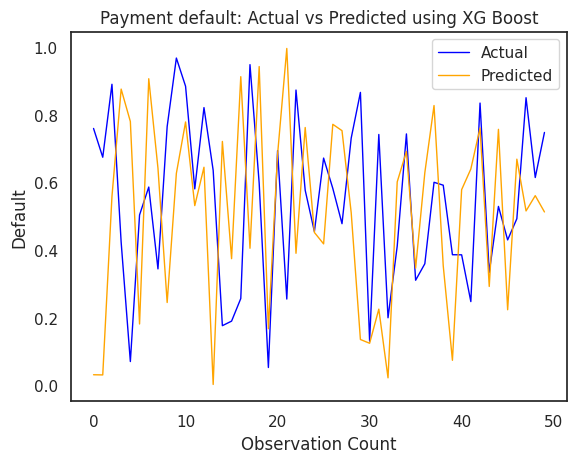

In [65]:
xgb= XGBClassifier(**best_params_xgb)
model= xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
num_samples = 50

# Sample data
y_test = np.random.random((50,1))
y_pred = np.random.random((50,1))

# Remove extra dimension
y_test = y_test[:,0]
y_pred = y_pred[:,0]

import seaborn as sns

sns.lineplot(x=range(num_samples), y=y_test, label="Actual", color="blue", linewidth=1)
sns.lineplot(x=range(num_samples), y=y_pred, label="Predicted", color = "orange", linewidth=1)

plt.title(f"Payment default: Actual vs Predicted using XG Boost")
plt.ylabel("Default")
plt.xlabel("Observation Count")

plt.legend()

plt.show()

# **Deployment**

Now that we built and selected the best model to recomend to our clients, we will summarize our learnings and findings to our clients and share any next steps.

**Data Used**

For this exercise we used the following data on users:
1. history of last 6 months of payments amounts
2. history of last 6 monthly statements balance
3. whether they defaulted on their last payment

3. credit balance on the account
4. demographic data such as age, education level, gender

**Learnings from data**
1. Based on the data analyzed, this credit card company experiences a 22% default rate on credit card payments. This tends to be high. The credit card company needs to further explore ways to reduce this rate.

2. Majority of clients are ages 29-45 and most of them have credit limits under 100k. Also under $100k credit limit is where most defaults occur.The credit card company needs to explore its underwriting processes and see if enhancements can be made based on these learnings.

3. Surprisingly users with higher level education are defaulting more than the others but also these users are granted credit limits above 200k. The credit card company may consider looking at this segment's behavior in addition to other data points it may have on them such as income, employment status, categories where credit is spent, asset level...
4. Advanced age users with ages greater than 60 and credit limits greater than 200k had higher propensity of defaulting.

5. This data did not contain information on users recent income, asset levels, categories of goods and services where most of the spending occurs, underrighting credit card limits, further increases or decreases on credit card limits. These and more can be data points that can further enhance a model's ability to make default predictions.
6. We can use supervised machine learning models to train and test their accuracy just on the data available. Even with limited data categories we were able to achieve test scores in 82%.

**Learnings from model training and testing**

1. Models used achieved good performance without much hypertuning. This is important as the company can use "out of the box" models to help it predict default rates with pretty high accuracy.
2. The credit card company can consider optimizing for test accuracy and train time combined. While there may be models such as KNN and SVM that can offer higher prediction rates, they are slow and resource intensive to train as seen above in the train time column of the results table.
3. In addition to using prediction from models the credit card company can use this information in conjuction to other methods of reducing losses they may already employ. Data from these models can spearhead actions such as:
  *   outreach campaign to users
  *   credit usage counseling
  * payment plans
4. Likely the credit card company retains more data on its users, or if it does not it is recommended they do. Some potentially valuable information for further training these models was mentioned above


